In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean, losses_val_mean = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=100,
    models_dir='./models',
    checkpoint_frequency=10,
    property='H',
    map_property=lambda t: get_property(t, "H"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>losses_train_mean</summary>
  [63.51369769840344, 3.1282553619062976, 0.9297428075206056, 0.3005700357685102, 0.15596170743525037, 0.10541563317209962, 0.08127435184811604, 0.06198856420830898, 0.04618702902968328, 0.03541462188540095, 0.027493987204278023, 0.02265238496385045, 0.01928545673560839, 0.016382298946860285, 0.014304677201592796, 0.012429997593158446, 0.010993271621519769, 0.009812107360235349, 0.008764162221697937, 0.008063040235801306, 0.006907037294107469, 0.006420513625599831, 0.005931678519664033, 0.005471493920665715, 0.005122682332681392, 0.004778326399463175, 0.004459362804312484, 0.004253114570768409, 0.004008388421324143, 0.0037459997175950666, 0.003393786175499914, 0.0031920165837451527, 0.003069096134377934, 0.0029410905772136713, 0.002820957619343601, 0.0026982774829264243, 0.0025671388751198803, 0.0025074618860599445, 0.002398315320372681, 0.002378576249196917, 0.0020769808784451113, 0.002017540169562565, 0.001958917590408078, 0.0018840159923376074, 0.0018321404267553916, 0.0017837658871640882, 0.0017589521002834352, 0.0017114310647242286, 0.001646361257599281, 0.0016376859618845165, 0.0014519651525261568, 0.0014288285254070402, 0.0013838912464774406, 0.0013569244901733616, 0.0013323860000365429, 0.0013078410010869187, 0.0012810278545169731, 0.0012301153408814016, 0.0012014913798735892, 0.0011745361852777093, 0.001080090142159487, 0.0010539800025793705, 0.0010308445392640821, 0.0010225719805153834, 0.00099050849687432, 0.0009813343615790687, 0.0009698775434917002, 0.0009298942221914058, 0.0009287708375464195, 0.0009022726266225804, 0.0008263133950606531, 0.0007955944952992347, 0.0008078566495412785, 0.0007804434023615664, 0.0007701350195098152, 0.0007823699133386671, 0.0007695838590165275, 0.0007414541085249183, 0.0007247644875628212, 0.0007056721236502248, 0.000655370445947631, 0.000654189942245727, 0.0006404873085166323, 0.0006306880135595332, 0.0006130393838548454, 0.0006157872931823778, 0.000599647992923346, 0.0005965720928265693, 0.0005922260309930567, 0.0005771315335952403, 0.0005315534587975499, 0.0005291949455179054, 0.0005192103415670622, 0.0005274986761345594, 0.0005024634082699579, 0.0005015683133347699, 0.00048765784910118857, 0.0004938269134289164, 0.00048393271428885334, 0.00048548744009045144]
</details>


<details>
  <summary>losses_val_mean</summary>
  [4.69232835397902, 1.597889180569439, 0.40899512126665477, 0.18067578283006816, 0.10011989463009258, 0.06773772747080978, 0.1499953772042955, 0.0418949996571098, 0.05587786411888806, 0.019726745661434085, 0.016649649034689445, 0.020439053735142605, 0.011667693839658887, 0.01298889549791202, 0.024296547368964364, 0.006409052156239151, 0.006795569623777076, 0.00531045548945347, 0.0041390054934294426, 0.02772842319024165, 0.005493142638975795, 0.003578462942132547, 0.002496746794237792, 0.002375730671675713, 0.006019832895519693, 0.005450648294901184, 0.003998561743196086, 0.013415711929946584, 0.0019900273336757065, 0.0030160193670872733, 0.0020386909419860054, 0.0014073424946340338, 0.001645108081207285, 0.002007663080678579, 0.0013262452787731074, 0.0010262254756579132, 0.0043676933468400035, 0.002440365800662687, 0.004442463545715823, 0.0014799009830336702, 0.0012418283768208162, 0.0010845834774410807, 0.002039170128320883, 0.0008887889114627851, 0.0016251233260729245, 0.004184907003085195, 0.0008928168868751206, 0.0013812137072283161, 0.0017995685432328863, 0.0007448744214486865, 0.001001736709134946, 0.0009890671072070453, 0.0005095270618967893, 0.0005624762409870171, 0.0006923483134894864, 0.0005179719847748304, 0.0006665489946004791, 0.0010555297883469133, 0.0008361132452540597, 0.004304653691440726, 0.0012840551899531525, 0.00041354049763097983, 0.0005670376405683225, 0.0012641398172567075, 0.0004627208975920065, 0.0004516491155151371, 0.0003414511617713711, 0.0005456930739268903, 0.0005164018976189778, 0.0008106216850920383, 0.0012886636486179037, 0.0005535257276271289, 0.0002873913269219539, 0.0007045999441049189, 0.0007853484710593311, 0.0003973982153610085, 0.0005900760489680966, 0.00032013610232922506, 0.000834374921639153, 0.0002688790288897666, 0.0004138960014511298, 0.0003730491940647921, 0.00023558012777857355, 0.00032143051405940934, 0.0006422726773944343, 0.0005091334952979647, 0.0003499479553784534, 0.0005237275971113508, 0.0007525661479863153, 0.00022678154435613694, 0.0001963271657615724, 0.00018902665822763103, 0.00016796781472264353, 0.0002958827252576419, 0.001050522789092106, 0.00021411269011233623, 0.00018984955320764174, 0.00019154831350846134, 0.0005013035023493833, 0.00016128734763496598]
</details>

In [ ]:
losses_train_mean_MSE_Ha = [63.51369769840344, 3.1282553619062976, 0.9297428075206056, 0.3005700357685102, 0.15596170743525037, 0.10541563317209962, 0.08127435184811604, 0.06198856420830898, 0.04618702902968328, 0.03541462188540095, 0.027493987204278023, 0.02265238496385045, 0.01928545673560839, 0.016382298946860285, 0.014304677201592796, 0.012429997593158446, 0.010993271621519769, 0.009812107360235349, 0.008764162221697937, 0.008063040235801306, 0.006907037294107469, 0.006420513625599831, 0.005931678519664033, 0.005471493920665715, 0.005122682332681392, 0.004778326399463175, 0.004459362804312484, 0.004253114570768409, 0.004008388421324143, 0.0037459997175950666, 0.003393786175499914, 0.0031920165837451527, 0.003069096134377934, 0.0029410905772136713, 0.002820957619343601, 0.0026982774829264243, 0.0025671388751198803, 0.0025074618860599445, 0.002398315320372681, 0.002378576249196917, 0.0020769808784451113, 0.002017540169562565, 0.001958917590408078, 0.0018840159923376074, 0.0018321404267553916, 0.0017837658871640882, 0.0017589521002834352, 0.0017114310647242286, 0.001646361257599281, 0.0016376859618845165, 0.0014519651525261568, 0.0014288285254070402, 0.0013838912464774406, 0.0013569244901733616, 0.0013323860000365429, 0.0013078410010869187, 0.0012810278545169731, 0.0012301153408814016, 0.0012014913798735892, 0.0011745361852777093, 0.001080090142159487, 0.0010539800025793705, 0.0010308445392640821, 0.0010225719805153834, 0.00099050849687432, 0.0009813343615790687, 0.0009698775434917002, 0.0009298942221914058, 0.0009287708375464195, 0.0009022726266225804, 0.0008263133950606531, 0.0007955944952992347, 0.0008078566495412785, 0.0007804434023615664, 0.0007701350195098152, 0.0007823699133386671, 0.0007695838590165275, 0.0007414541085249183, 0.0007247644875628212, 0.0007056721236502248, 0.000655370445947631, 0.000654189942245727, 0.0006404873085166323, 0.0006306880135595332, 0.0006130393838548454, 0.0006157872931823778, 0.000599647992923346, 0.0005965720928265693, 0.0005922260309930567, 0.0005771315335952403, 0.0005315534587975499, 0.0005291949455179054, 0.0005192103415670622, 0.0005274986761345594, 0.0005024634082699579, 0.0005015683133347699, 0.00048765784910118857, 0.0004938269134289164, 0.00048393271428885334, 0.00048548744009045144]
losses_val_mean_MSE_Ha = [4.69232835397902, 1.597889180569439, 0.40899512126665477, 0.18067578283006816, 0.10011989463009258, 0.06773772747080978, 0.1499953772042955, 0.0418949996571098, 0.05587786411888806, 0.019726745661434085, 0.016649649034689445, 0.020439053735142605, 0.011667693839658887, 0.01298889549791202, 0.024296547368964364, 0.006409052156239151, 0.006795569623777076, 0.00531045548945347, 0.0041390054934294426, 0.02772842319024165, 0.005493142638975795, 0.003578462942132547, 0.002496746794237792, 0.002375730671675713, 0.006019832895519693, 0.005450648294901184, 0.003998561743196086, 0.013415711929946584, 0.0019900273336757065, 0.0030160193670872733, 0.0020386909419860054, 0.0014073424946340338, 0.001645108081207285, 0.002007663080678579, 0.0013262452787731074, 0.0010262254756579132, 0.0043676933468400035, 0.002440365800662687, 0.004442463545715823, 0.0014799009830336702, 0.0012418283768208162, 0.0010845834774410807, 0.002039170128320883, 0.0008887889114627851, 0.0016251233260729245, 0.004184907003085195, 0.0008928168868751206, 0.0013812137072283161, 0.0017995685432328863, 0.0007448744214486865, 0.001001736709134946, 0.0009890671072070453, 0.0005095270618967893, 0.0005624762409870171, 0.0006923483134894864, 0.0005179719847748304, 0.0006665489946004791, 0.0010555297883469133, 0.0008361132452540597, 0.004304653691440726, 0.0012840551899531525, 0.00041354049763097983, 0.0005670376405683225, 0.0012641398172567075, 0.0004627208975920065, 0.0004516491155151371, 0.0003414511617713711, 0.0005456930739268903, 0.0005164018976189778, 0.0008106216850920383, 0.0012886636486179037, 0.0005535257276271289, 0.0002873913269219539, 0.0007045999441049189, 0.0007853484710593311, 0.0003973982153610085, 0.0005900760489680966, 0.00032013610232922506, 0.000834374921639153, 0.0002688790288897666, 0.0004138960014511298, 0.0003730491940647921, 0.00023558012777857355, 0.00032143051405940934, 0.0006422726773944343, 0.0005091334952979647, 0.0003499479553784534, 0.0005237275971113508, 0.0007525661479863153, 0.00022678154435613694, 0.0001963271657615724, 0.00018902665822763103, 0.00016796781472264353, 0.0002958827252576419, 0.001050522789092106, 0.00021411269011233623, 0.00018984955320764174, 0.00019154831350846134, 0.0005013035023493833, 0.00016128734763496598]

losses_train_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_train_mean_MSE_Ha))
losses_val_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_val_mean_MSE_Ha))

fig, axs = plt.subplots(nrows=2)
plt.tight_layout()
axs[0].plot(range(100), losses_train_mean_RMSE_eV, c='g')
axs[0].plot(range(100), losses_val_mean_RMSE_eV, c='b')
axs[0].legend (('Обучение', 'Валидация'))
axs[0].set(xlabel='Число эпох', ylabel='RMSE H, эВ')
axs[1].plot(range(10, 100), losses_train_mean_RMSE_eV[10:100], c='g')
axs[1].plot(range(10, 100), losses_val_mean_RMSE_eV[10:100], c='b')
axs[1].legend (('Обучение', 'Валидация'))
axs[1].set(xlabel='Число эпох', ylabel='RMSE H, эВ')
print(losses_val_mean_RMSE_eV[-1])
plt.show()

0.06624672617682646

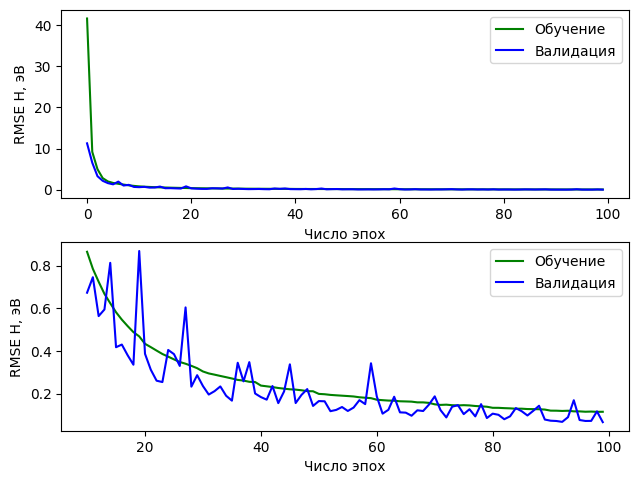